In [40]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

print("Imported libraries")

Imported libraries


In [42]:
def find_jpgs_sorted(folder_path):
    jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    return sorted(jpg_files)

def read_license_plate(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.title("Grayscale Image")
    plt.show()  # Show the first image
    
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.title("Edge Detection")
    plt.show()  # Show the second image
    
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    location
    
    mask  = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.title("Segmented License Plate")
    plt.show()  # Show the third image
    
    (x,y) = np.where(mask==255)
    (x1,y1) = (np.min(x), np.min(y))
    (x2,y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped License Plate")
    plt.show()  # Show the fourth image
    
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    result
    
    text = result[0][-2]
    font  = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.title("Final Image with Detected Text")
    plt.show()  # Show the final annotated image
    
print("Custom functions created")

Custom functions created


In [44]:
folder_path = '.'
jpg_list = find_jpgs_sorted(folder_path)
print(jpg_list)

['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg']


This is the car in image1.jpg


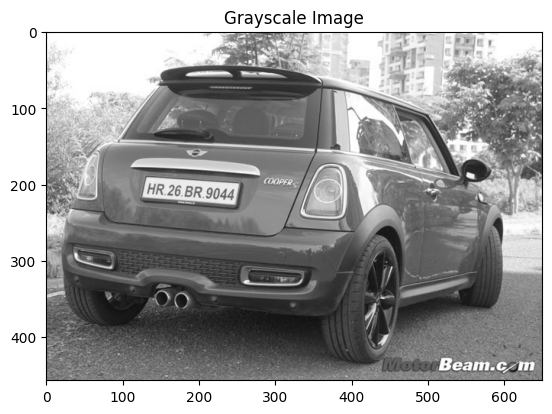

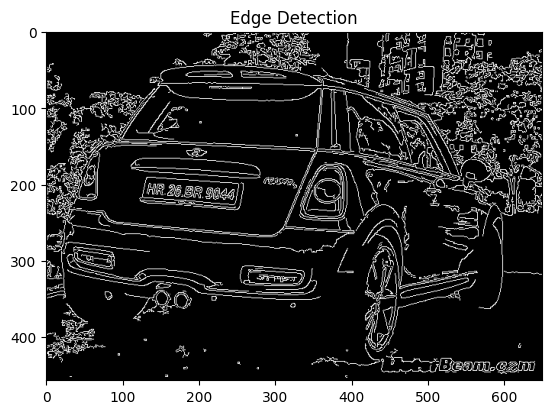

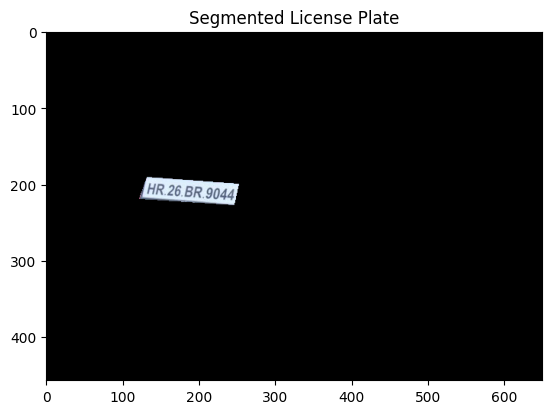

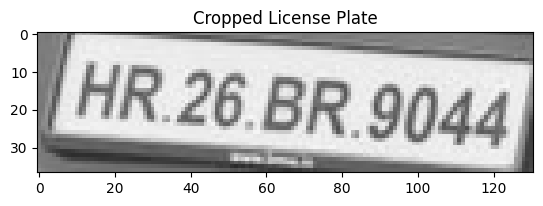

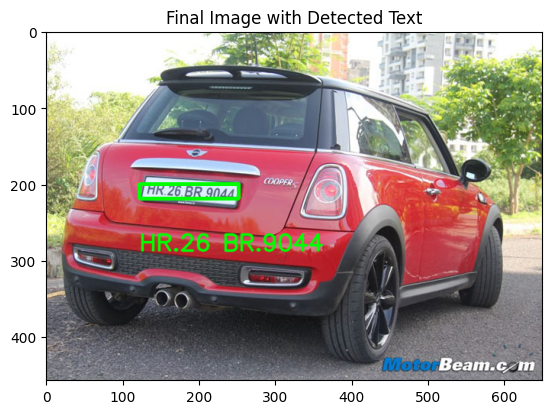

This is the car in image2.jpg


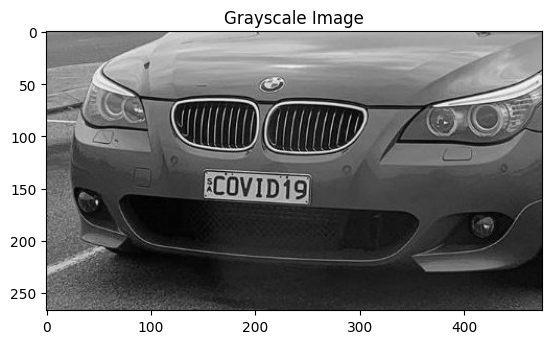

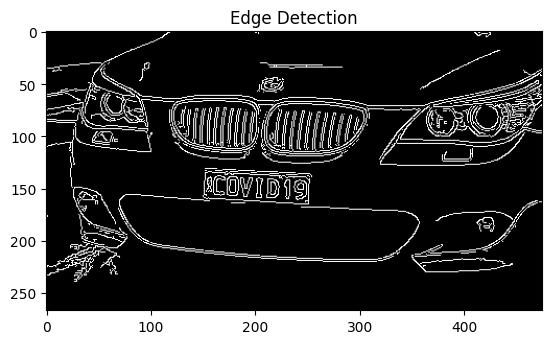

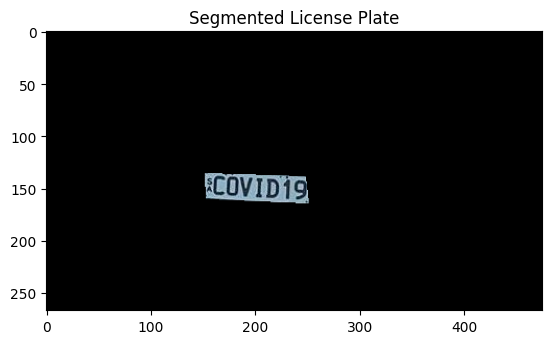

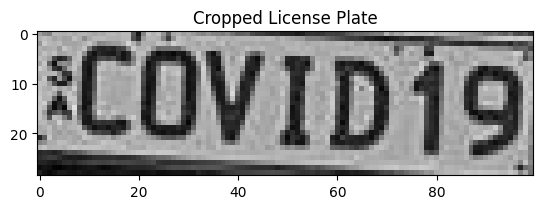

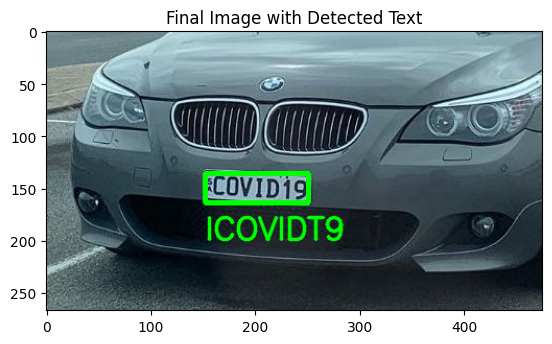

This is the car in image3.jpg


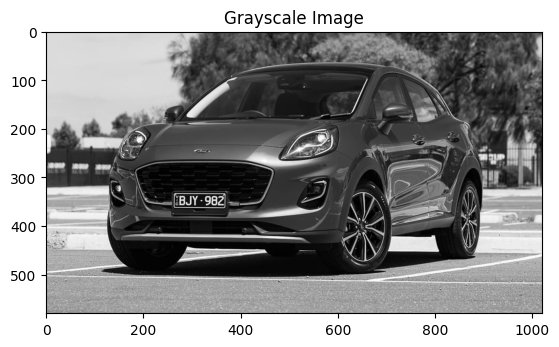

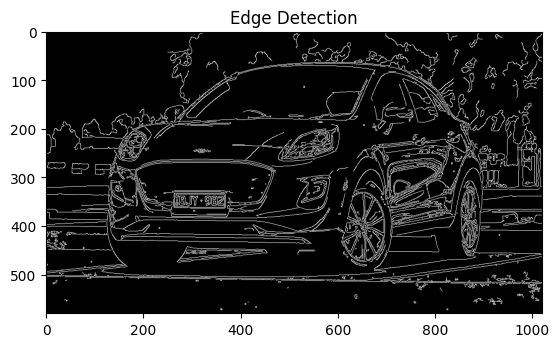

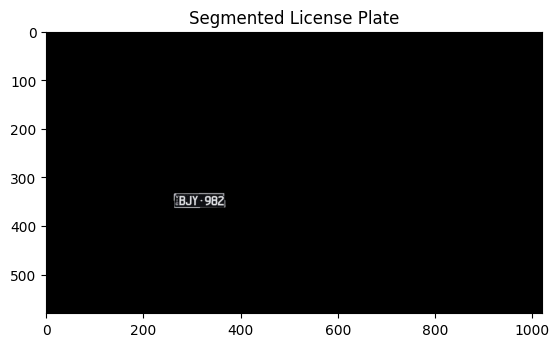

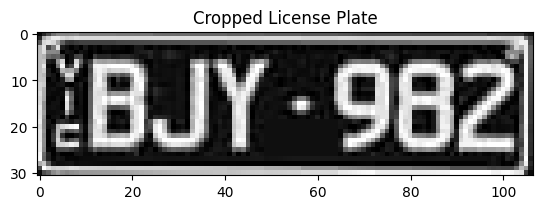

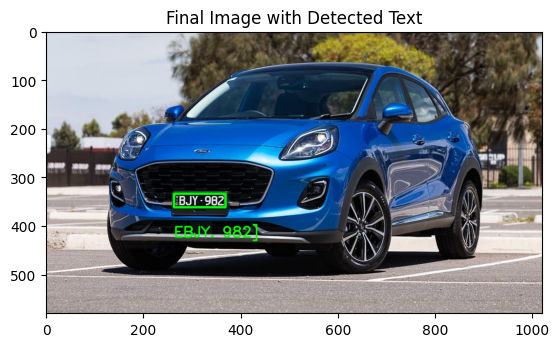

This is the car in image4.jpg


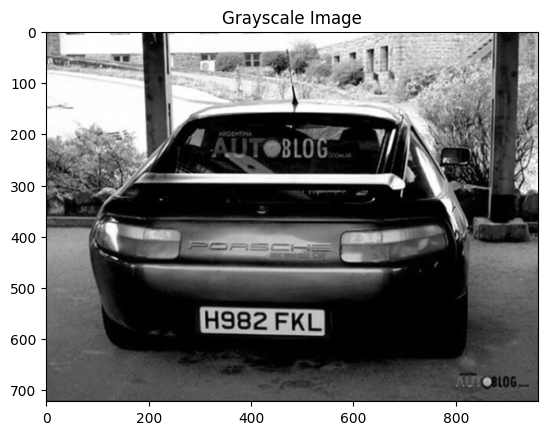

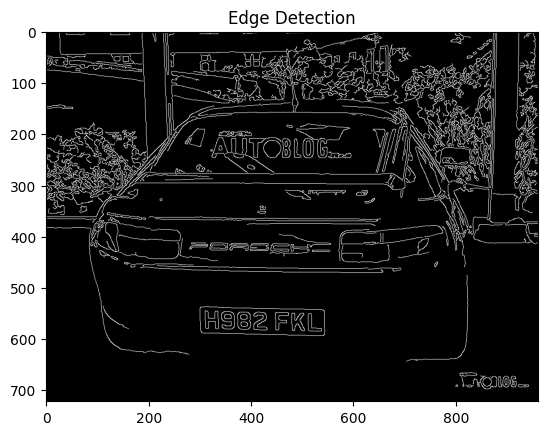

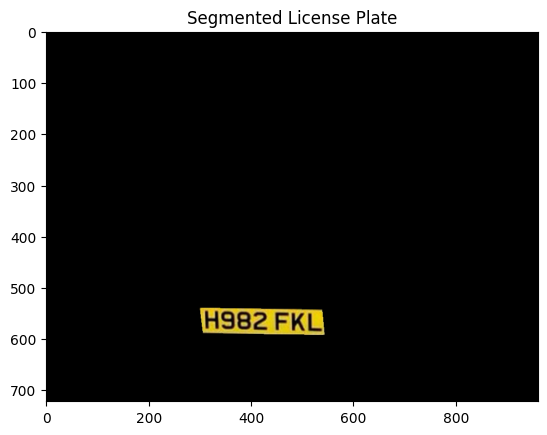

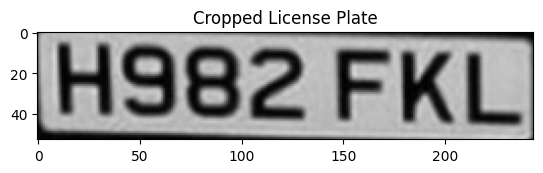

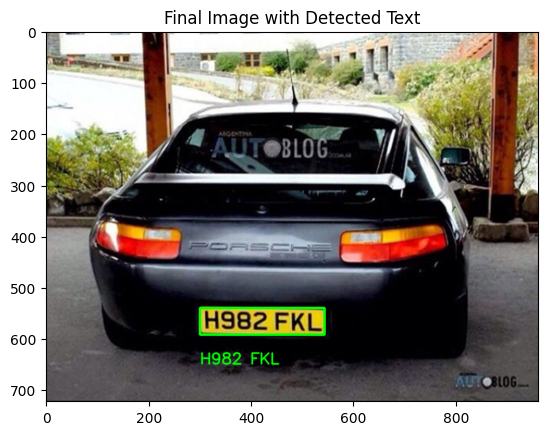

In [48]:
for cars in jpg_list:
    print("This is the car in " + cars)
    read_license_plate(cars)
    